<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/Animals_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import cv2
import os
from tqdm import tqdm



print(tf.__version__)

2.1.0


# Cargamos archivos desde local

In [0]:

# Cargamos archivos a Colab 

#from google.colab import files
#uploaded = files.upload()

In [5]:
!ls

data  data_animales.zip  matriz_confusion.py  __pycache__  sample_data


In [6]:
! pwd

/content


# Descompresion de nuestro dataset 

In [0]:
#data = zipfile.ZipFile('data_animales.zip',mode='r')
#data.extractall()

In [8]:
!ls  # Verificamos el proceso

data  data_animales.zip  matriz_confusion.py  __pycache__  sample_data


# Lectura de imagenes

In [0]:
especie=['gato','gorila','perro']

# Imagenes para entrenamiento

Para este dataset de entranamiento tenemos imagenes de gatos , perros y gorilas distribuidos de la siguiente manera :

1. **Gato :** 456 imagenes
2. **Gorila :** 19 imagenes
3. **Perro :** 524 imagenes


In [0]:
Largo=200
Altura=200

In [11]:
train_img=[]
train_tag=[]

for animal in tqdm(range(len(especie))):

  for i in os.listdir('data/entrenamiento/'+especie[animal]):
   
    if (especie[animal]=='gato'):
      train_tag.append(0)
    elif (especie[animal]=='gorila'):
      train_tag.append(1)
    else:
      train_tag.append(2)

    img=cv2.imread('data/entrenamiento/'+especie[animal]+'/'+i)
    train_img.append(cv2.resize(img,(Largo,Altura)))
  

  

100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


# Imagenes para validacion

Para este dataset de validación tenemos imagenes de gatos , perros y gorilas en diferentes posiciones y algunos con personas  distribuidos de la siguiente manera :

1. **Gato :** 1012 imagenes
2. **Gorila :** 20 imagenes
3. **Perro :** 1013 imagenes

In [12]:
test_img=[]
test_tag=[]

for animal in tqdm(range(len(especie))):

  for i in os.listdir('data/validacion/'+especie[animal]):
    
    try : 
      img_val=cv2.imread('data/validacion/'+especie[animal]+'/'+i)
      test_img.append(cv2.resize(img_val,(Largo,Altura)))
      if (especie[animal]=='gato'):
        test_tag.append(0)
      elif (especie[animal]=='gorila'):
        test_tag.append(1)
      else:
        test_tag.append(2)
    except:
      pass

100%|██████████| 3/3 [00:05<00:00,  2.33s/it]


In [13]:
len(test_img)

2043

In [14]:
len(test_tag)

2043

In [15]:
test_img[990].shape

(200, 200, 3)

In [16]:
len(train_img)  # 999 imagenes para entrenamiento

999

In [17]:
len(test_img)  # 2045 imagenes para entrenamiento

2043

# Visualización de imagenes

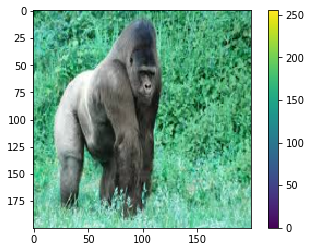

In [18]:
plt.figure()
plt.imshow(train_img[460])
plt.colorbar()
plt.grid(False)
plt.show()

# Verificamos el etiquetado

Imprimimos 24 imagenes de prueba para verificar si el etiquetado es correcto.

In [0]:
class_names = ['Gato', 'Gorila', 'Perro']

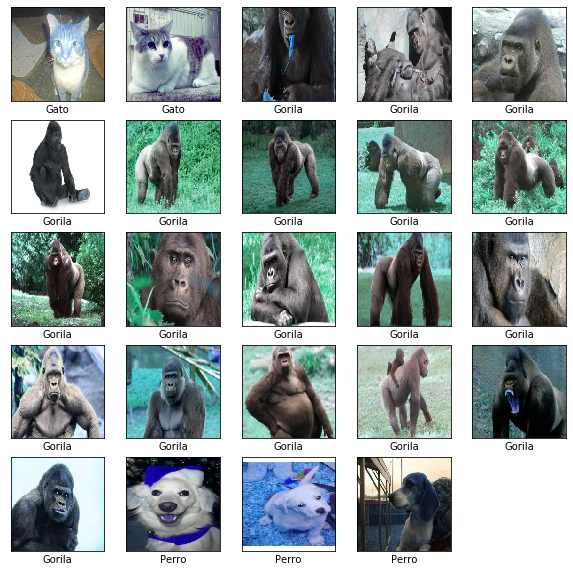

In [20]:
plt.figure(figsize=(10,10))
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[454+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_tag[454+i]])
plt.show()

In [21]:
len(train_img) 

999

In [22]:
len(test_img)

2043

# Convertimos a array nuestras imagenes

In [0]:
train_images=np.asarray(train_img)
test_images=np.asarray(test_img)

In [24]:
print(train_images.shape)
print('\n')
print(test_images.shape)

(999, 200, 200, 3)


(2043, 200, 200, 3)


# Normalizamos imagenes

Normalización de nuestro dataset
A continuación dividimos nuestras imagenes por 255 para obtener valores entre 0 y 1


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_tag = np.array(train_tag)
test_tag = np.array(test_tag)

# Creación de nuestro modelo

In [0]:
# Modelo -- 1

#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(Largo,Altura,3)),
#    keras.layers.Dense(128, activation='relu'),
    
#    keras.layers.Dense(3, activation='softmax'),
    
#])

In [0]:
# Modelo -- 2

model = keras.Sequential([
    
    # CONV1 Y MAX-POOLING1
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(Largo,Altura,3), padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # CONV2 Y MAX-POOLING2
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # Aplanar, FC1, FC2 y salida
   keras.layers.Flatten(),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(84, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(3, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               40960256  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

# Compilamos el modelo

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos nuestro modelo

In [31]:
model.fit(train_images, train_tag, epochs=300,batch_size=128,verbose=1)

Train on 999 samples
Epoch 1/300
999/999 [==============================] - 4s 4ms/sample - loss: 0.9607 - accuracy: 0.4825
Epoch 2/300
999/999 [==============================] - 1s 835us/sample - loss: 0.8569 - accuracy: 0.4795
Epoch 3/300
999/999 [==============================] - 1s 841us/sample - loss: 0.8638 - accuracy: 0.5135
Epoch 4/300
999/999 [==============================] - 1s 888us/sample - loss: 0.8434 - accuracy: 0.5015
Epoch 5/300
999/999 [==============================] - 1s 885us/sample - loss: 0.8103 - accuracy: 0.5195
Epoch 6/300
999/999 [==============================] - 1s 840us/sample - loss: 0.8328 - accuracy: 0.4955
Epoch 7/300
999/999 [==============================] - 1s 785us/sample - loss: 0.8269 - accuracy: 0.4945
Epoch 8/300
999/999 [==============================] - 1s 813us/sample - loss: 0.8163 - accuracy: 0.5005
Epoch 9/300
999/999 [==============================] - 1s 899us/sample - loss: 0.8168 - accuracy: 0.4945
Epoch 10/300
999/999 [==============

# Desempeño del modelo

In [32]:
test_loss, test_acc = model.evaluate(test_images,  test_tag, verbose=1)

print('\nTest accuracy:', test_acc)

2043/2043 [==============================] - 1s 716us/sample - loss: 1.0468 - accuracy: 0.6285

Test accuracy: 0.6284875


**NOTA :** Como podemos observar nuestro modelo no logra clasificar de la mejor forma , entonces el siguiente paso es mejorar el modelo

# Predicciones del modelo

In [0]:
predictions = model.predict(test_images)

In [34]:
np.argmax(predictions[100]) # Predicción del modelo

0

In [35]:
test_tag[100] # Etiqueta real 

0

# Visualización de nuestras predicciones

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Visualizamos una imagen en particular

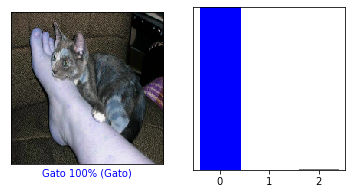

In [39]:
i = 40
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_tag, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_tag)
plt.show()

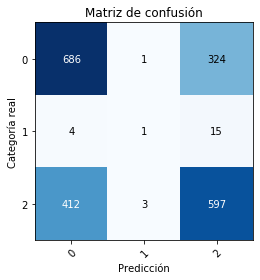

In [38]:
from matriz_confusion import graficar_matriz_de_confusion

y_pred = np.argmax(predictions,axis=1)
etiquetas = ['0','1','2']
graficar_matriz_de_confusion(test_tag, y_pred, etiquetas)

# Observaciones 

Como podemos observar la clase en la que mas acerto nuestro modelo fue los ***gatos*** seguidamente la categoria ***perros*** y por ultimo como era de esperarse fue la clase ***gorila*** debido a que apenas contabamos con 20 imagenes , como recomendación queda probar con otras arquitecturas ya entrenadas y jugar con los parametros de epocas y tamaño de lote . 

# FIN ....